In [30]:
%matplotlib inline
from matplotlib import style
style.use("fivethirtyeight")
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
import datetime as dt

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func 

In [33]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [35]:
 # View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [38]:
# Find the most recent date in the data set.
recentdate = (session.query(measurement.date).order_by(measurement.date.desc()).first())
recentdate

('2017-08-23')

<AxesSubplot:title={'center':'Precipitation 2016-2017'}, xlabel='date'>

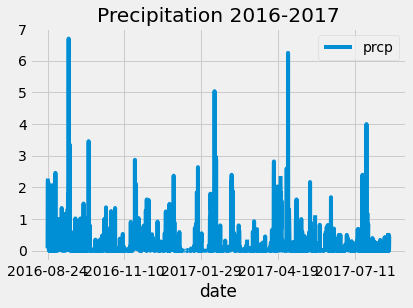

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recentdate = list(np.ravel(recentdate))[0]
recentdate = dt.datetime.strptime(recentdate, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
year = int(dt.datetime.strftime(recentdate, "%Y"))
month = int(dt.datetime.strftime(recentdate, "%m"))
day = int(dt.datetime.strftime(recentdate, "%d"))
prevyear = dt.date(year, month, day) - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
rainscore = (session.query(measurement.date, measurement.prcp).filter(measurement.date > prevyear).order_by(measurement.date).all())

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rainscore)
rain_df = rain_df.set_index("date")

# Sort the dataframe by date
rain_df = rain_df.sort_index(ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(title="Precipitation 2016-2017")

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [43]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station).count()
print(f"Station Count: {station_count}")

Station Count: 9


In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = (session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = active_stations[0][0]

station_name = (session.query(station.name).filter_by(station = most_active))
station_name = station_name[0][0]
print(f"The most active station is {most_active}: {station_name}.")

highest_temp = (session.query(measurement.tobs).filter(measurement.station == most_active).order_by(measurement.tobs.desc()).first())
highest_temp = highest_temp[0]
print(f"The highest temperature recorded there is {highest_temp} degrees Farenheit.")

lowest_temp = (session.query(measurement.tobs).filter(measurement.station == most_active).order_by(measurement.tobs.asc()).first())
lowest_temp = lowest_temp[0]
print(f"The lowest temperature recorded there is {lowest_temp} degrees Farenheit.")

avg_temp = (session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active))
avg_temp = "{0:.3}".format(avg_temp[0][0])
print(f"The average temperature there is {avg_temp} degrees Farenheit.")

The most active station is USC00519281: WAIHEE 837.5, HI US.
The highest temperature recorded there is 85.0 degrees Farenheit.
The lowest temperature recorded there is 54.0 degrees Farenheit.
The average temperature there is 71.7 degrees Farenheit.


<AxesSubplot:ylabel='Frequency'>

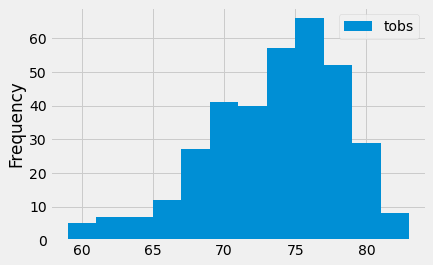

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogramtempData = (session.query(Measurement.date, Measurement.tobs)
year_data = (session.query(measurement.date, measurement.tobs).filter(measurement.date > prevyear).filter(measurement.station == most_active).order_by(measurement.date).all())

new_table = pd.DataFrame(year_data)
new_table = new_table.set_index("date")

#sory by date
new_table = new_table.sort_index(ascending=True)

#histogram plot with pandas
new_table.plot(kind='hist', bins=12)


In [47]:
# Close Session
session.close()